In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
batch_size = 100
img_height = 256
img_width = 256

In [4]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/DL_Project/data/train',
    image_size= (img_height, img_width),
    batch_size=batch_size)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/DL_Project/data/test',
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/DL_Project/data/val',
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [5]:
class_names = training_ds.class_names
class_names

['Accident', 'Non Accident']

In [6]:
img_shape = (img_height, img_width, 3)
base_model = VGG16(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.trainable = False

In [7]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 5)

Epoch 1/5
8/8 [==============================] - 800s 96s/step - loss: 3.3223 - accuracy: 0.5651 - val_loss: 0.8608 - val_accuracy: 0.6224
Epoch 2/5
8/8 [==============================] - 738s 93s/step - loss: 0.5539 - accuracy: 0.7396 - val_loss: 0.3378 - val_accuracy: 0.8878
Epoch 3/5
8/8 [==============================] - 706s 88s/step - loss: 0.2628 - accuracy: 0.9153 - val_loss: 0.3011 - val_accuracy: 0.9082
Epoch 4/5
8/8 [==============================] - 703s 89s/step - loss: 0.1645 - accuracy: 0.9583 - val_loss: 0.2295 - val_accuracy: 0.9082
Epoch 5/5
8/8 [==============================] - 698s 88s/step - loss: 0.1029 - accuracy: 0.9646 - val_loss: 0.1898 - val_accuracy: 0.9184


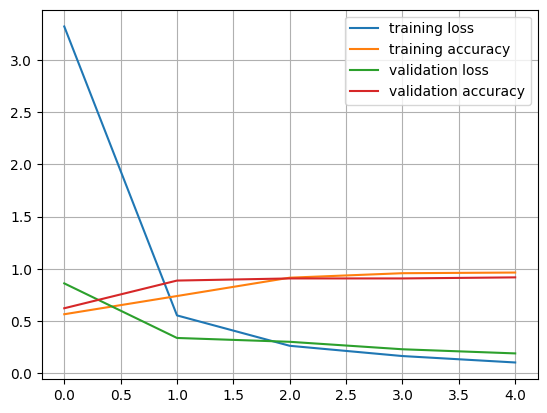

In [10]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 79s 18s/step


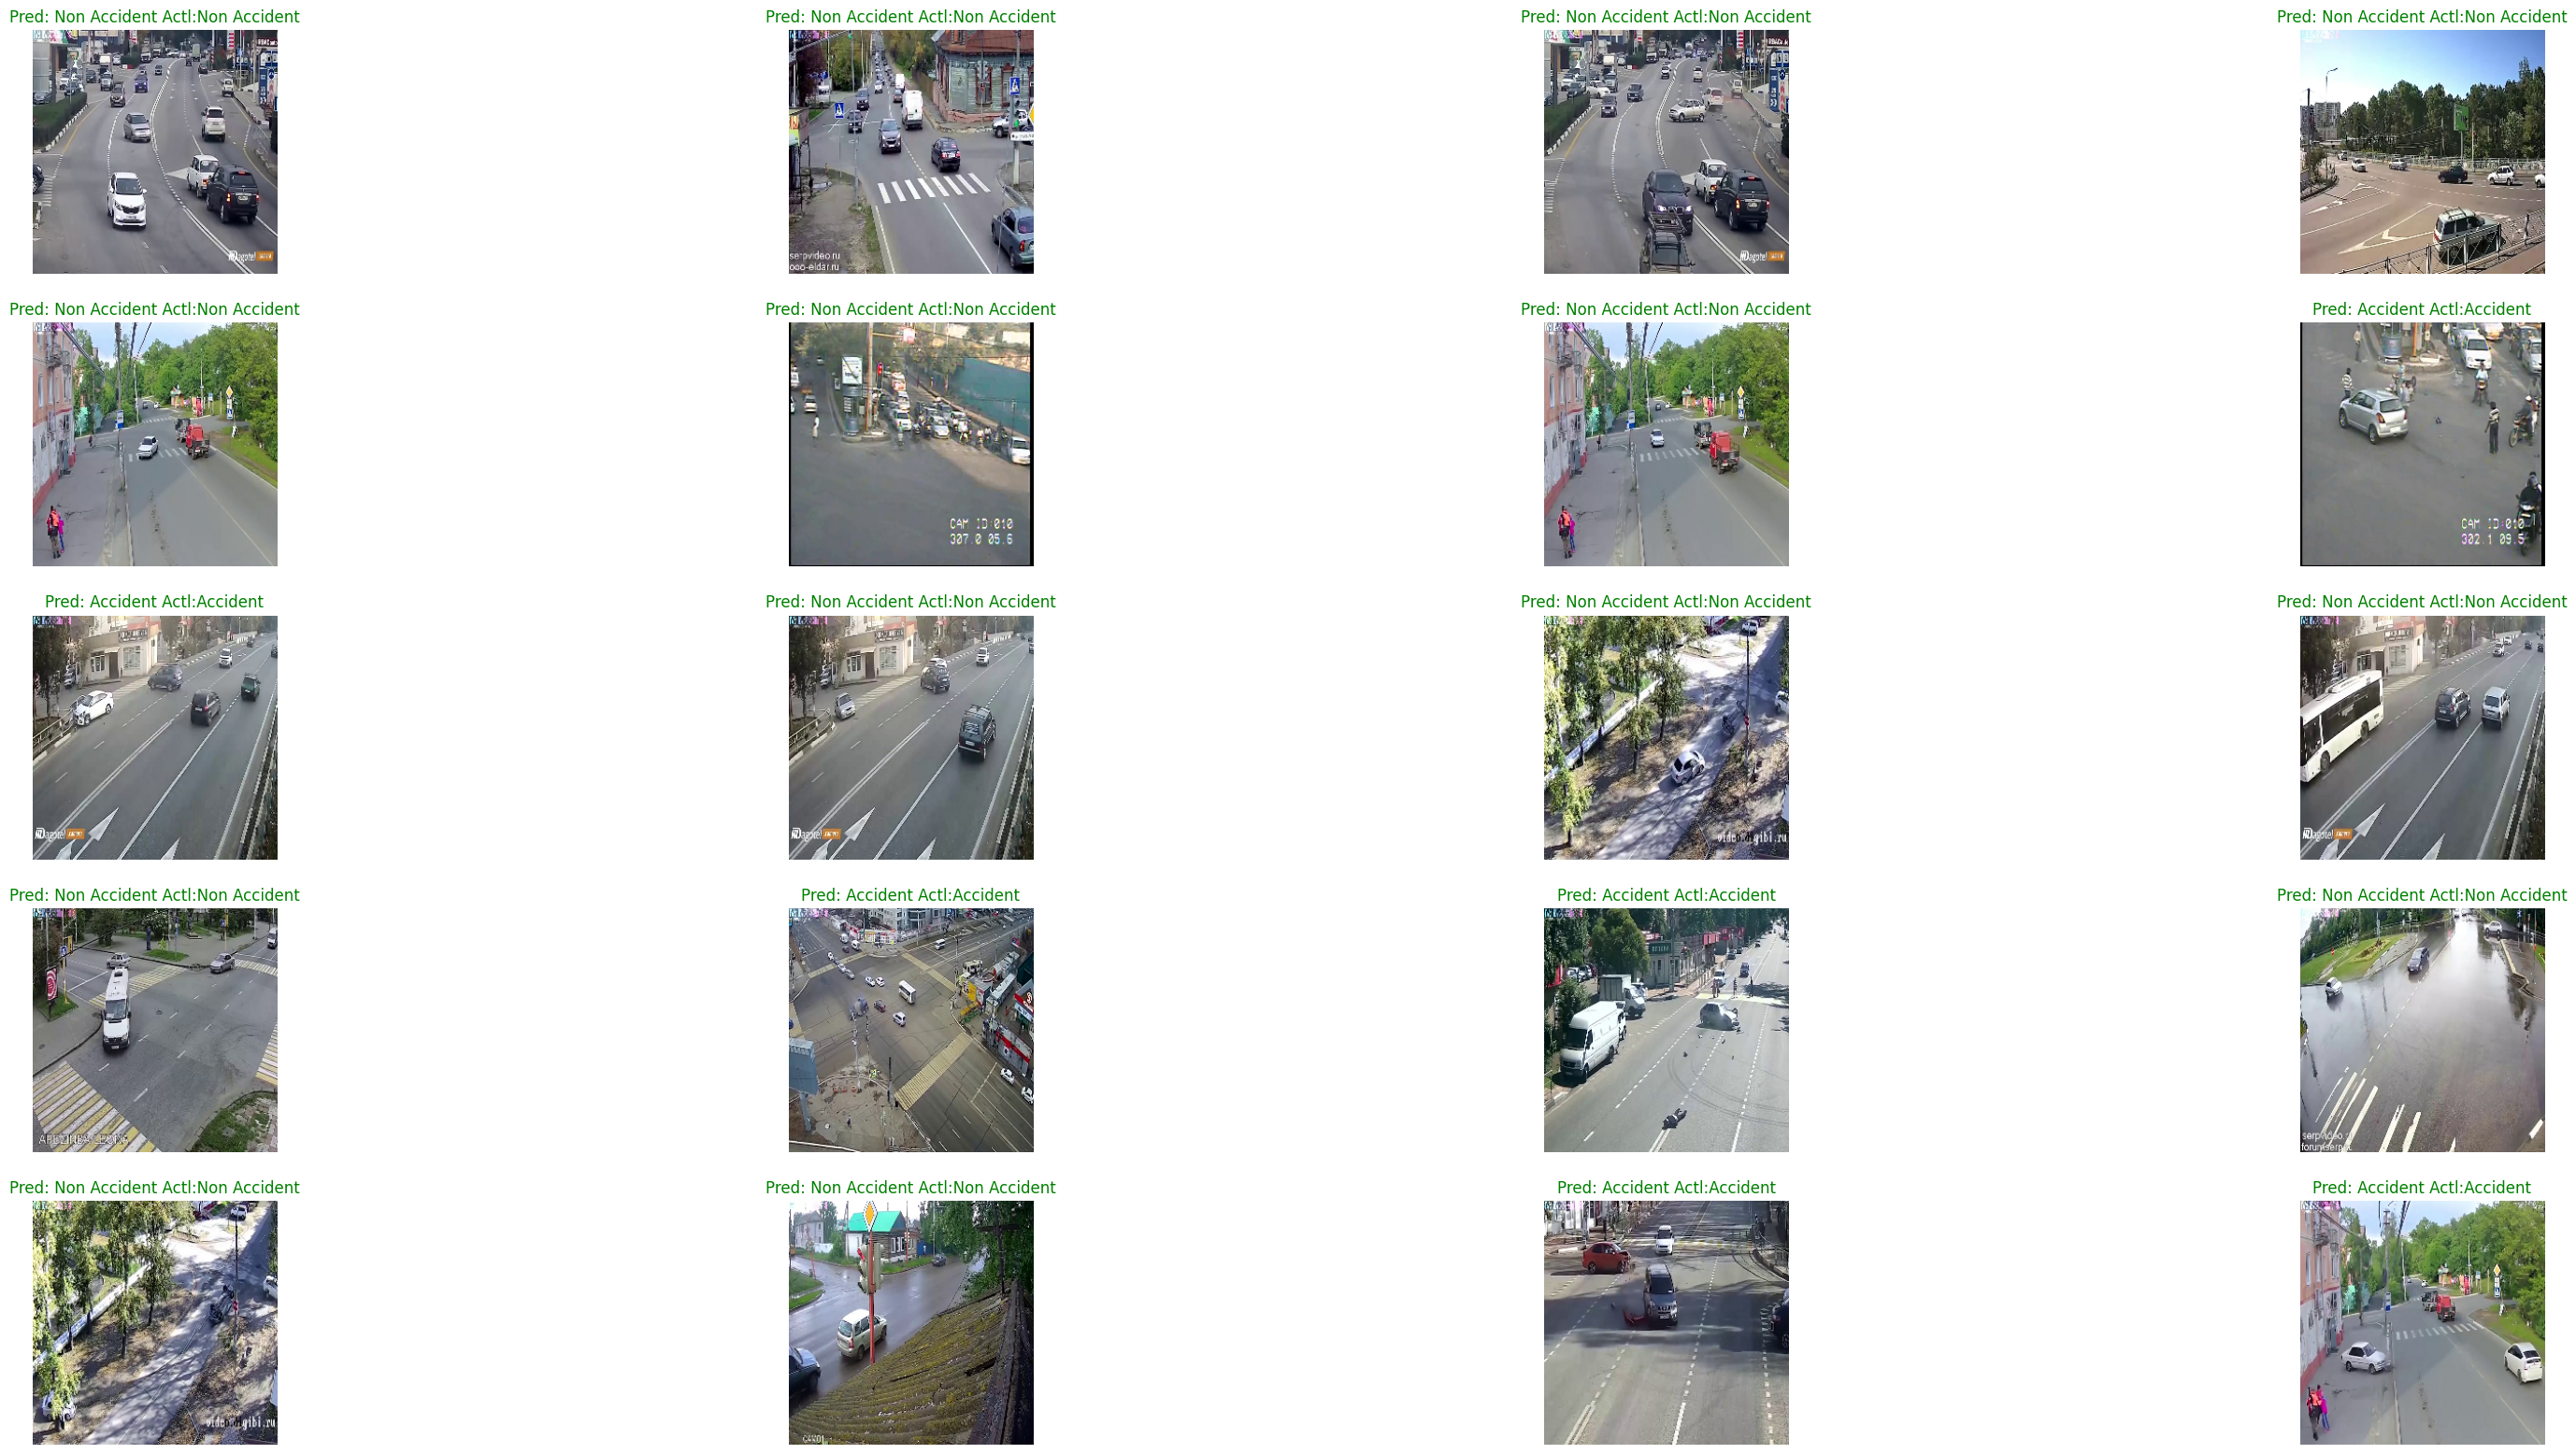

In [11]:
#Visualize predictionss
AccuracyVector = []
plt.figure(figsize=(40, 40))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if (predlabel[i] == class_names[labels[i]]):
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "green")
        else:
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "red")
        plt.axis('off')
        plt.grid(True)

In [12]:
truePositive=0
trueNegative=0
falsePositive=0
falseNegative=0
#positive: accident
#negative: non accident
for i in range(0, 100):
    if(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Accident'):
        truePositive+=1
    elif(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Non Accident'):
        trueNegative+=1
    elif(predlabel[i]=='Non Accident' and class_names[labels[i]]=='Accident'):
        falseNegative+=1
    else:
        falsePositive+=1

In [13]:
print(f'True positives are: {truePositive}')
print(f'True negatives are: {trueNegative}')
print(f'False negatives are: {falseNegative}')
print(f'False positives are: {falsePositive}')

True positives are: 47
True negatives are: 52
False negatives are: 0
False positives are: 1


In [14]:
from sklearn.metrics import classification_report

y_true = np.concatenate([y for x, y in testing_ds])

y_pred = model.predict(testing_ds)
y_pred = np.argmax(y_pred, axis=1)

report = classification_report(y_true, y_pred, target_names=class_names)

print(report)

1/1 [==============================] - 78s 78s/step
              precision    recall  f1-score   support

    Accident       0.42      0.43      0.42        47
Non Accident       0.48      0.47      0.48        53

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.45      0.45      0.45       100



1/1 [==============================] - 85s 85s/step


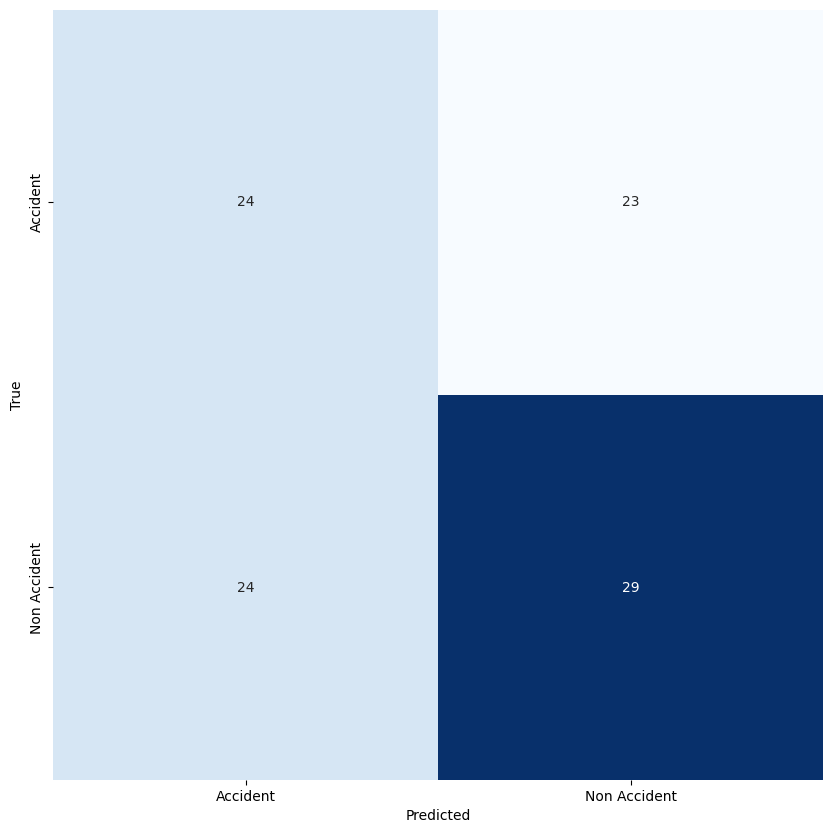

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = np.concatenate([y for x, y in testing_ds])

y_pred = model.predict(testing_ds)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names, cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [17]:
import cv2
image=[]
label=[]

c=1
cap= cv2.VideoCapture('/content/drive/MyDrive/DL_Project/car_accident.mp4')
while True:
    grabbed, frame = cap.read()
    if c%30==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        if(len(image)==75):
            break
    c+=1

cap.release()

30
1/1 [==============================] - 1s 692ms/step
60
1/1 [==============================] - 1s 687ms/step
90
1/1 [==============================] - 1s 675ms/step
120
1/1 [==============================] - 1s 670ms/step
150
1/1 [==============================] - 1s 680ms/step
180
1/1 [==============================] - 1s 688ms/step
210
1/1 [==============================] - 1s 681ms/step
240
1/1 [==============================] - 1s 675ms/step
270
1/1 [==============================] - 1s 687ms/step
300
1/1 [==============================] - 1s 686ms/step
330
1/1 [==============================] - 1s 670ms/step
360
1/1 [==============================] - 1s 683ms/step
390
1/1 [==============================] - 1s 1s/step
420
1/1 [==============================] - 1s 1s/step
450
1/1 [==============================] - 1s 1s/step
480
1/1 [==============================] - 1s 737ms/step
510
1/1 [==============================] - 1s 672ms/step
540
1/1 [==============================] - 

No Accident
AxesImage(size=(360, 640))


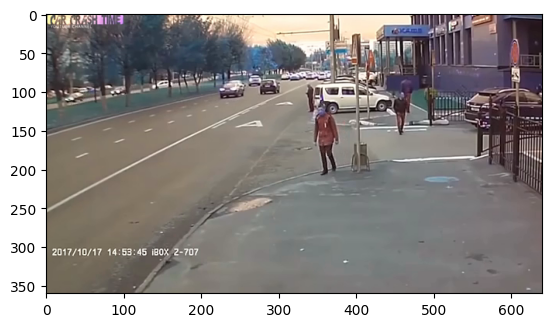

In [18]:
print(label[20])
print(plt.imshow(image[20]))

No Accident
AxesImage(size=(360, 640))


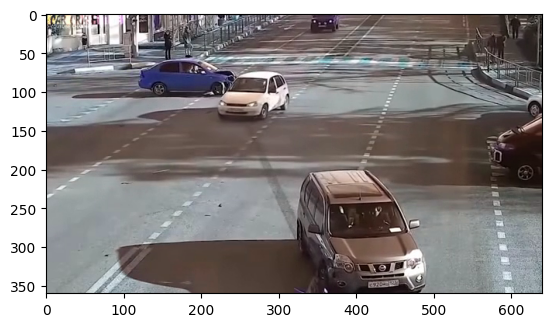

In [19]:
print(label[5])
print(plt.imshow(image[5]))

Accident Detected
AxesImage(size=(360, 640))


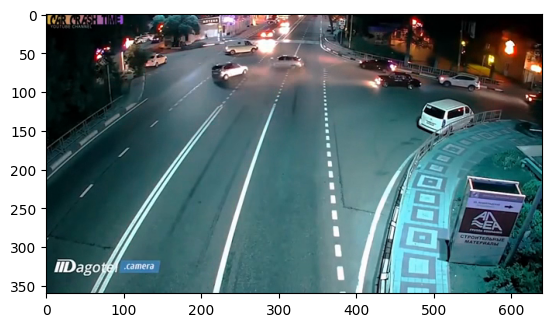

In [28]:
print(label[13])
print(plt.imshow(image[13]))